In [155]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [156]:
!pip install contextily

import contextily as ctx


Defaulting to user installation because normal site-packages is not writeable


In [157]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable


In [158]:
!pip install numpy pandas seaborn matplotlib statsmodels scikit-learn yellowbrick shapely 


Defaulting to user installation because normal site-packages is not writeable


In [159]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from geopandas import GeoDataFrame
from shapely.geometry import Point
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

print("Imports ok")

Imports ok


In [160]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [161]:
data = pd.read_csv("C:/Users/MrWhi/OneDrive/Desktop/univpm/DataScience/Progetto_Datascience/python/knmi.csv")

data.head()

,Location,Date,Avg Wind Direction (Degrees),Avg Wind Speed (km/h),Avg Temperature (°C),Minimum Temperature (°C),Maximum Temperature (°C),Sun Hours,Precipitation,Air Pressure (Pa)
0,Voorschoten,2022-01-01,201,52,12.1,9.7,13.3,0.9,1,1020.2
1,Voorschoten,2022-01-02,227,81,11.6,9.7,13.6,3.0,33,1010.6
2,Voorschoten,2022-01-03,233,70,9.6,8.3,10.9,2.5,0,1007.1
3,Voorschoten,2022-01-04,284,33,6.7,3.9,8.9,0.2,5,998.1
4,Voorschoten,2022-01-05,296,78,5.8,3.9,7.1,0.9,56,1007.2


In [162]:
data.columns

Index(['Location', 'Date', 'Avg Wind Direction (Degrees)',
       'Avg Wind Speed (km/h)', 'Avg Temperature (°C)',
       'Minimum Temperature (°C)', 'Maximum Temperature (°C)', 'Sun Hours',
       'Precipitation', 'Air Pressure (Pa)'],
      dtype='object')

In [163]:
data.dtypes

Location                         object
Date                             object
Avg Wind Direction (Degrees)      int64
Avg Wind Speed (km/h)             int64
Avg Temperature (°C)            float64
Minimum Temperature (°C)        float64
Maximum Temperature (°C)        float64
Sun Hours                       float64
Precipitation                     int64
Air Pressure (Pa)               float64
dtype: object

In [164]:
## Create year_month, year, month for easier to analyse
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021 entries, 0 to 8020
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Location                      8021 non-null   object        
 1   Date                          8021 non-null   datetime64[ns]
 2   Avg Wind Direction (Degrees)  8021 non-null   int64         
 3   Avg Wind Speed (km/h)         8021 non-null   int64         
 4   Avg Temperature (°C)          8021 non-null   float64       
 5   Minimum Temperature (°C)      8021 non-null   float64       
 6   Maximum Temperature (°C)      8021 non-null   float64       
 7   Sun Hours                     8021 non-null   float64       
 8   Precipitation                 8021 non-null   int64         
 9   Air Pressure (Pa)             8021 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 626.8+ KB


In [166]:
data.describe()

,Date,Avg Wind Direction (Degrees),Avg Wind Speed (km/h),Avg Temperature (°C),Minimum Temperature (°C),Maximum Temperature (°C),Sun Hours,Precipitation,Air Pressure (Pa)
count,8021,8021.000000,8021.000000,8021.000000,8021.000000,8021.000000,8021.00000,8021.000000,8021.000000
mean,2022-07-02 01:37:50.589701888,188.529485,37.473881,11.653198,7.094801,15.820995,6.09636,20.454681,1016.959606
min,2022-01-01 00:00:00,1.000000,1.000000,-6.400000,-10.600000,-1.900000,0.00000,-1.000000,981.500000
25%,2022-04-02 00:00:00,117.000000,21.000000,7.100000,3.000000,10.100000,2.10000,0.000000,1011.100000
50%,2022-07-02 00:00:00,205.000000,33.000000,11.700000,7.200000,16.100000,5.80000,0.000000,1017.500000
75%,2022-10-01 00:00:00,255.000000,49.000000,16.300000,11.300000,20.900000,9.90000,17.000000,1022.700000
max,2022-12-31 00:00:00,360.000000,160.000000,30.300000,22.200000,39.500000,15.70000,564.000000,1044.100000
std,NaN,93.479044,22.838809,6.056238,5.549131,7.165646,4.46003,46.657243,9.219071


In [167]:
data.duplicated().sum()
data.drop_duplicates()

,Location,Date,Avg Wind Direction (Degrees),Avg Wind Speed (km/h),Avg Temperature (°C),Minimum Temperature (°C),Maximum Temperature (°C),Sun Hours,Precipitation,Air Pressure (Pa)
0,Voorschoten,2022-01-01,201,52,12.1,9.7,13.3,0.9,1,1020.2
1,Voorschoten,2022-01-02,227,81,11.6,9.7,13.6,3.0,33,1010.6
2,Voorschoten,2022-01-03,233,70,9.6,8.3,10.9,2.5,0,1007.1
3,Voorschoten,2022-01-04,284,33,6.7,3.9,8.9,0.2,5,998.1
4,Voorschoten,2022-01-05,296,78,5.8,3.9,7.1,0.9,56,1007.2
...,...,...,...,...,...,...,...,...,...,...
8016,Maastricht,2022-12-27,209,55,5.2,3.5,8.3,2.7,-1,1024.2
8017,Maastricht,2022-12-28,207,87,9.1,6.2,10.8,0.5,13,1010.4
8018,Maastricht,2022-12-29,222,79,9.4,6.1,11.8,0.8,4,1006.1
8019,Maastricht,2022-12-30,196,70,9.2,4.7,13.9,0.0,22,1006.2


In [168]:
missing_values = data.isnull().sum()
missing_values = missing_values.sort_values(ascending = False)
missing_values

Location                        0
Date                            0
Avg Wind Direction (Degrees)    0
Avg Wind Speed (km/h)           0
Avg Temperature (°C)            0
Minimum Temperature (°C)        0
Maximum Temperature (°C)        0
Sun Hours                       0
Precipitation                   0
Air Pressure (Pa)               0
dtype: int64

In [169]:
data.shape

(8021, 10)

In [170]:

data['Location'].value_counts()

Location
Vlissingen            365
De Kooy               365
Volkel                365
Eindhoven             365
Herwijnen             365
Gilze-Rijen           365
Cabauw Mast           365
Rotterdam             365
Hoek van Holland      365
Westdorpe             365
Maastricht            365
Ee;de                 365
Hoogeveen             365
Deelen                365
Marknesse             365
Lelystad              365
De Bilt               365
Hoorn Terschelling    365
Schiphol              365
Voorschoten           364
Twenthe               361
Wilhelminadorp        361
Name: count, dtype: int64

In [171]:
def fill_missing_dates(data, location_column, date_column, numeric_columns, missing_data):

    # Assicurati che la colonna data sia in formato datetime
    data[date_column] = pd.to_datetime(data[date_column], errors='coerce')

    # Crea una lista per le nuove righe
    new_rows = []

    for location, dates in missing_data.items():
        # Filtra i dati per la località
        location_data = data[data[location_column] == location]

        # Calcola le medie delle colonne numeriche
        means = location_data[numeric_columns].mean(numeric_only=True)

        # Crea righe per ogni data mancante
        for date in dates:
            new_row = [location, date] + list(means)  # Località, Data, valori medi
            new_rows.append(new_row)

    # Crea un DataFrame per le nuove righe
    new_columns = [location_column, date_column] + numeric_columns
    new_data = pd.DataFrame(new_rows, columns=new_columns)

    # Concatena il nuovo DataFrame con i dati originali
    data = pd.concat([data, new_data], ignore_index=True)

    # Ordina i dati per località e data
    data.sort_values(by=[location_column, date_column], inplace=True)

    return data


# Specifica le colonne numeriche
numeric_columns = [
    'Avg Wind Direction (Degrees)',
    'Avg Wind Speed (km/h)',
    'Avg Temperature (°C)',
    'Minimum Temperature (°C)',
    'Maximum Temperature (°C)',
    'Sun Hours',
    'Precipitation',
    'Air Pressure (Pa)'
]

# Date mancanti per ciascuna località
missing_data = {
    'Voorschoten': [pd.Timestamp('2022-11-02')],
    'Twenthe': [
        pd.Timestamp('2022-03-25'),
        pd.Timestamp('2022-03-26'),
        pd.Timestamp('2022-03-27'),
        pd.Timestamp('2022-03-28')
    ],
    'Wilhelminadorp': [
        pd.Timestamp('2022-04-22'),
        pd.Timestamp('2022-04-23'),
        pd.Timestamp('2022-04-24'),
        pd.Timestamp('2022-04-25')
    ]
}

# Riempimento dei dati mancanti
data = fill_missing_dates(data, location_column='Location', date_column='Date', numeric_columns=numeric_columns, missing_data=missing_data)


DATA VISUALIZATION


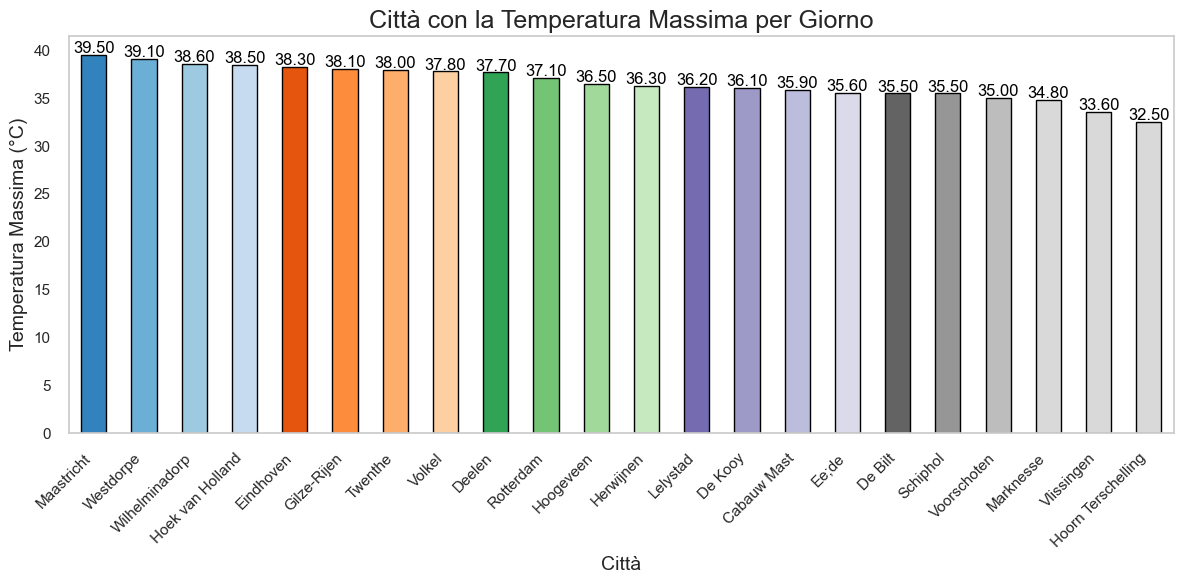

In [178]:
# Trova la città con la temperatura più alta
city_temp = data.groupby('Location')['Maximum Temperature (°C)'].max().sort_values(ascending=False)

# Impostazioni per il grafico
plt.figure(figsize=(12, 6))

# Usa una serie di colori unici per ogni barra
colors = plt.cm.tab20c(range(len(city_temp)))  # Utilizza la tabella di colori 'tab20c'

# Crea il grafico con colori diversi per ogni barra
city_temp.plot(kind='bar', color=colors, edgecolor='black')

# Aggiungi titoli e etichette
plt.title('Città con la Temperatura Massima per Giorno', fontsize=18)
plt.xlabel('Città', fontsize=14)
plt.ylabel('Temperatura Massima (°C)', fontsize=14)

# Aggiungi etichette sui barre per i valori
for i, value in enumerate(city_temp):
    plt.text(i, value + 0.2, f'{value:.2f}', ha='center', fontsize=12, color='black')

# Ruota le etichette dell'asse X per migliorare la leggibilità
plt.xticks(rotation=45, ha='right')

# Rimuovi la griglia per un look più pulito
plt.grid(False)

# Mostra il grafico
plt.tight_layout()
plt.show()




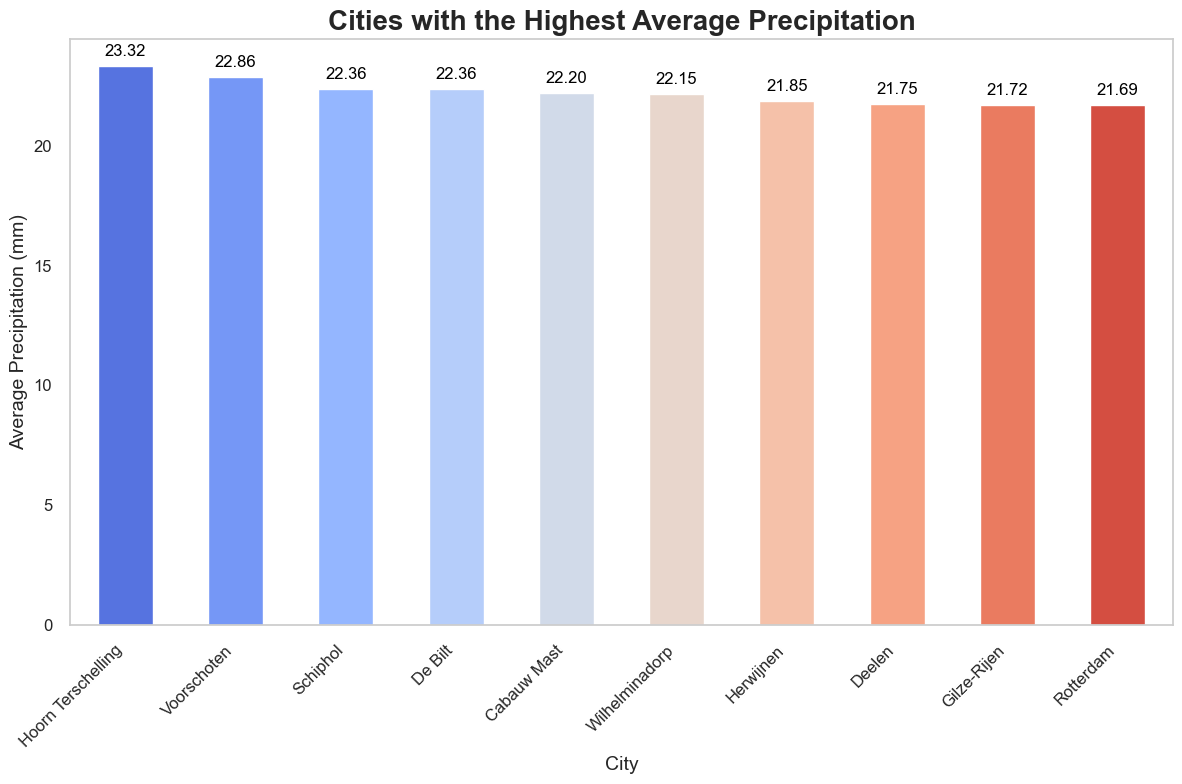

In [189]:
# Calcolare la precipitazione media per ciascuna città
city_precip = data.groupby('Location')['Precipitation'].mean()

# Selezionare le città con la precipitazione maggiore
top_cities_precip = city_precip.sort_values(ascending=False).head(10)

# Crea il grafico a barre
plt.figure(figsize=(12, 8))
bars = top_cities_precip.plot(kind='bar', color=sns.color_palette("coolwarm", len(top_cities_precip)))

# Impostazioni del grafico
plt.title('Cities with the Highest Average Precipitation', fontsize=20, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Precipitation (mm)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Aggiungi annotazioni sui valori delle barre
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(f'{yval:.2f}', xy=(bar.get_x() + bar.get_width() / 2, yval), 
                  xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=12, color='black')

# Rimuovere la griglia per un aspetto più pulito
plt.grid(False)

# Mostra il grafico
plt.tight_layout()
plt.show()



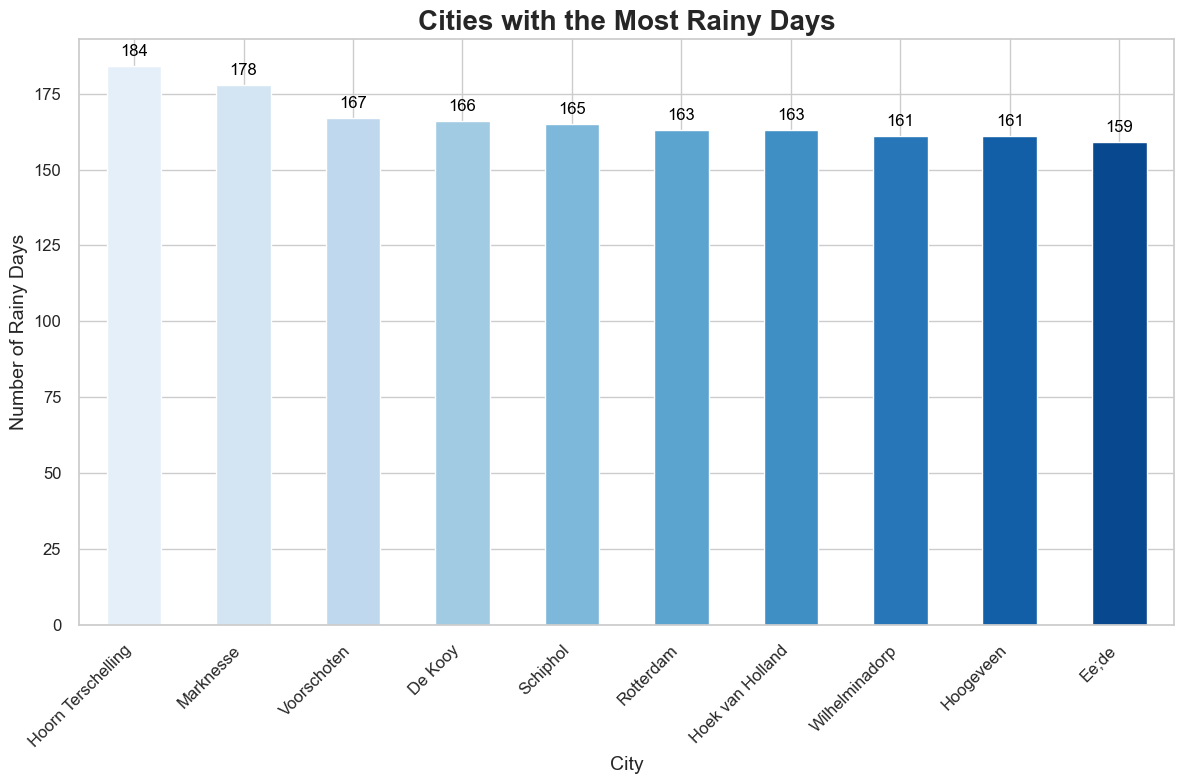

In [200]:
city_rainy_days = data.groupby('Location')['Precipitation'].apply(lambda x: (x > 0).sum())
top_rainy_cities = city_rainy_days.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
bars = top_rainy_cities.plot(kind='bar', color=sns.color_palette("Blues", len(top_rainy_cities)))
plt.title('Cities with the Most Rainy Days', fontsize=20, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Rainy Days', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(f'{yval:.0f}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                  xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

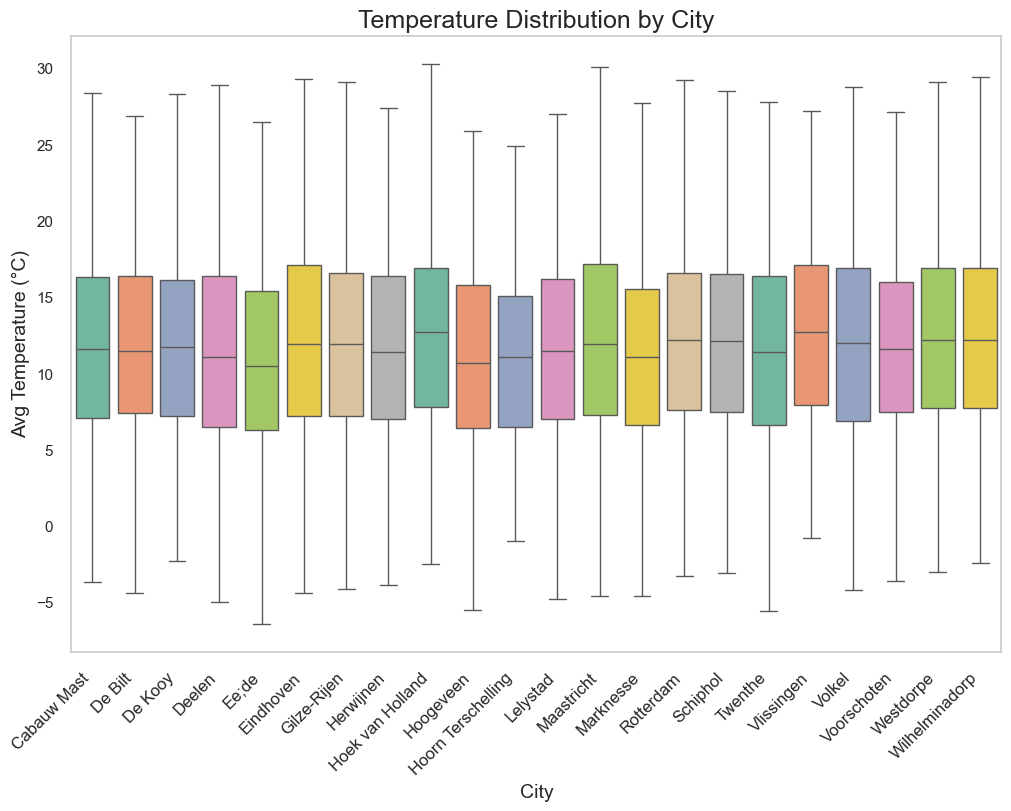

In [193]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='Avg Temperature (°C)', data=data, palette='Set2')
plt.title('Temperature Distribution by City', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Avg Temperature (°C)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(False)
plt.show()


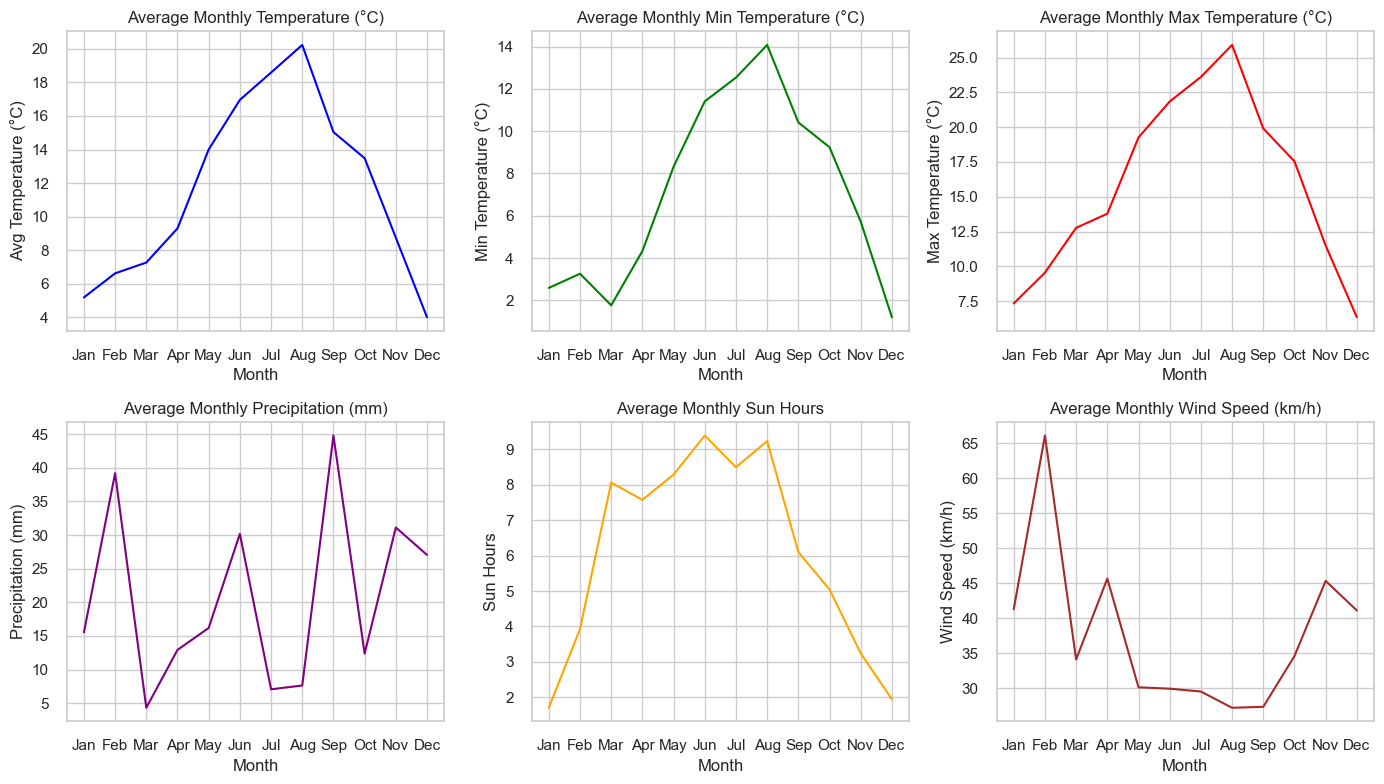

In [195]:
# Assicurati che la colonna 'Date' sia in formato datetime
data['Date'] = pd.to_datetime(data['Date'])

# Estrai il mese dalla data
data['Month'] = data['Date'].dt.month

# Calcola la temperatura media per ogni mese
monthly_temps = data.groupby('Month')['Avg Temperature (°C)'].mean()
monthly_min_temp = data.groupby('Month')['Minimum Temperature (°C)'].mean()
monthly_max_temp = data.groupby('Month')['Maximum Temperature (°C)'].mean()
monthly_precip = data.groupby('Month')['Precipitation'].mean()
monthly_sun_hours = data.groupby('Month')['Sun Hours'].mean()
monthly_wind_speed = data.groupby('Month')['Avg Wind Speed (km/h)'].mean()

# Crea il grafico per le diverse variabili
plt.figure(figsize=(14, 8))

# Lineplot per la temperatura media mensile
plt.subplot(2, 3, 1)
sns.lineplot(x=monthly_temps.index, y=monthly_temps.values, color='blue')
plt.title('Average Monthly Temperature (°C)')
plt.xlabel('Month')
plt.ylabel('Avg Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Lineplot per la temperatura minima mensile
plt.subplot(2, 3, 2)
sns.lineplot(x=monthly_min_temp.index, y=monthly_min_temp.values, color='green')
plt.title('Average Monthly Min Temperature (°C)')
plt.xlabel('Month')
plt.ylabel('Min Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Lineplot per la temperatura massima mensile
plt.subplot(2, 3, 3)
sns.lineplot(x=monthly_max_temp.index, y=monthly_max_temp.values, color='red')
plt.title('Average Monthly Max Temperature (°C)')
plt.xlabel('Month')
plt.ylabel('Max Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Lineplot per la precipitazione mensile
plt.subplot(2, 3, 4)
sns.lineplot(x=monthly_precip.index, y=monthly_precip.values, color='purple')
plt.title('Average Monthly Precipitation (mm)')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Lineplot per le ore di sole mensili
plt.subplot(2, 3, 5)
sns.lineplot(x=monthly_sun_hours.index, y=monthly_sun_hours.values, color='orange')
plt.title('Average Monthly Sun Hours')
plt.xlabel('Month')
plt.ylabel('Sun Hours')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Lineplot per la velocità media del vento mensile
plt.subplot(2, 3, 6)
sns.lineplot(x=monthly_wind_speed.index, y=monthly_wind_speed.values, color='brown')
plt.title('Average Monthly Wind Speed (km/h)')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()


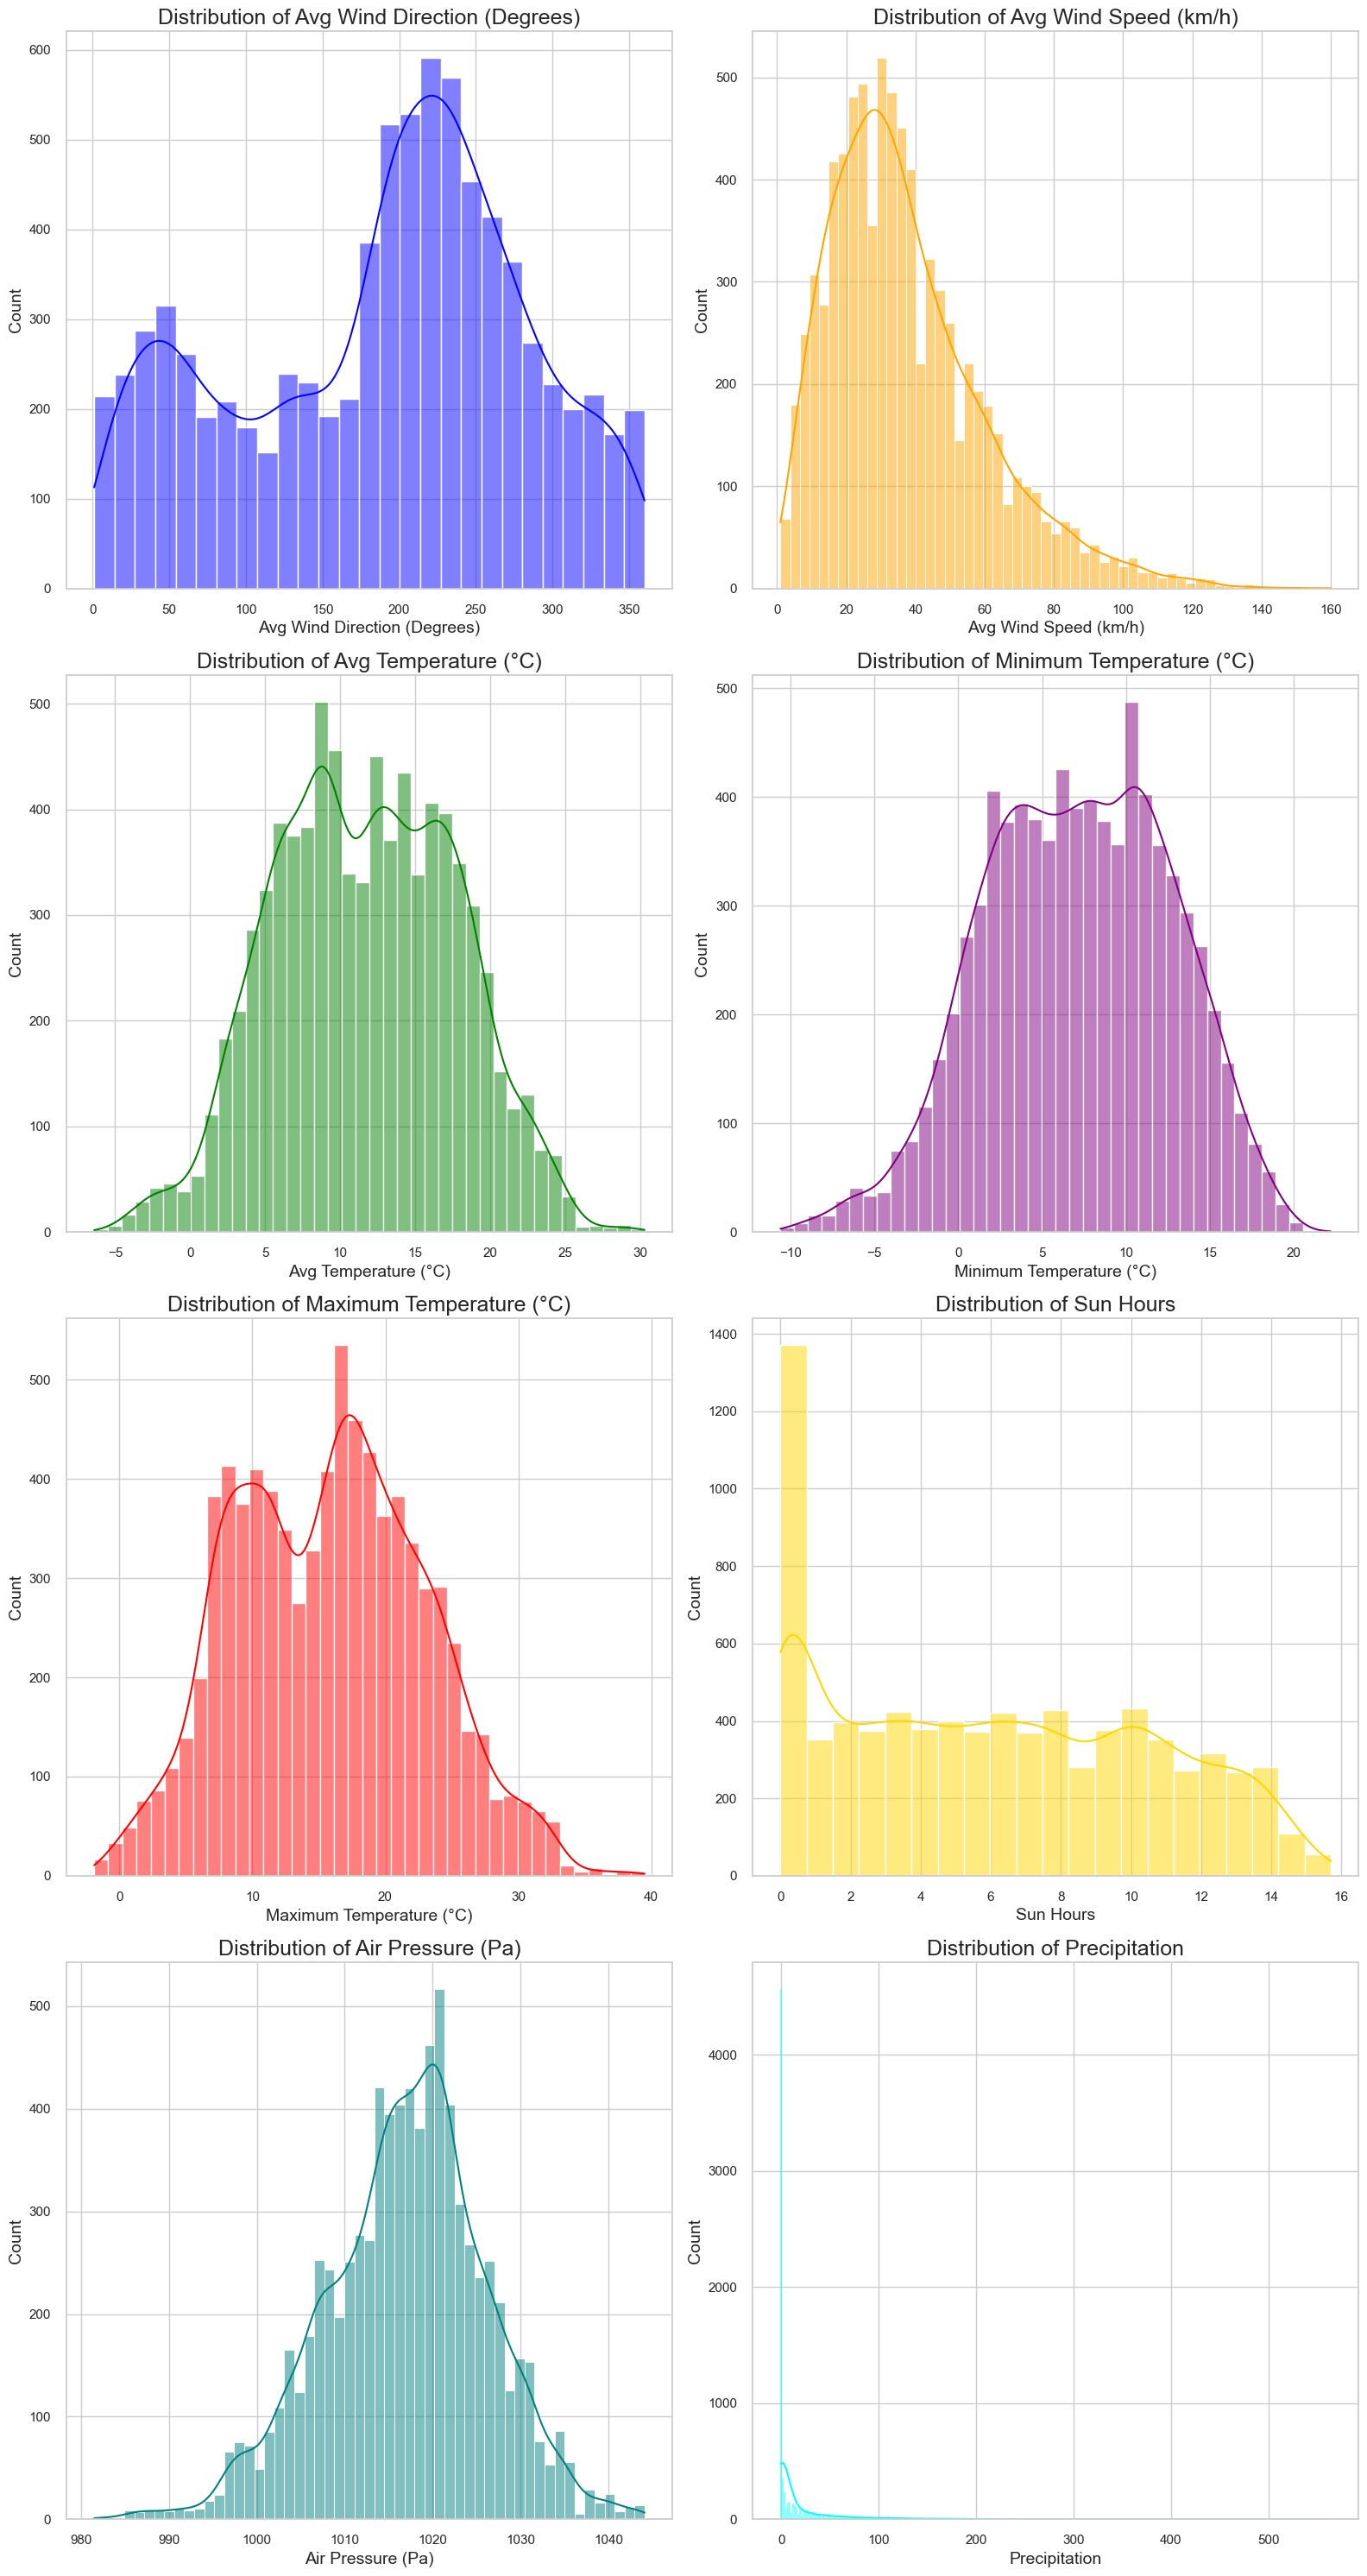

In [196]:
plt.figure(figsize=(16, 30))

# 1. Distribuzione della direzione media del vento
plt.subplot(4, 2, 1)
sns.set(style='whitegrid')
sns.histplot(data, x='Avg Wind Direction (Degrees)', kde=True, color='blue')
plt.title('Distribution of Avg Wind Direction (Degrees)', fontsize=18)
plt.xlabel('Avg Wind Direction (Degrees)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 2. Distribuzione della velocità media del vento
plt.subplot(4, 2, 2)
sns.histplot(data, x='Avg Wind Speed (km/h)', kde=True, color='orange')
plt.title('Distribution of Avg Wind Speed (km/h)', fontsize=18)
plt.xlabel('Avg Wind Speed (km/h)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 3. Distribuzione della temperatura media
plt.subplot(4, 2, 3)
sns.histplot(data, x='Avg Temperature (°C)', kde=True, color='green')
plt.title('Distribution of Avg Temperature (°C)', fontsize=18)
plt.xlabel('Avg Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 4. Distribuzione della temperatura minima
plt.subplot(4, 2, 4)
sns.histplot(data, x='Minimum Temperature (°C)', kde=True, color='purple')
plt.title('Distribution of Minimum Temperature (°C)', fontsize=18)
plt.xlabel('Minimum Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 5. Distribuzione della temperatura massima
plt.subplot(4, 2, 5)
sns.histplot(data, x='Maximum Temperature (°C)', kde=True, color='red')
plt.title('Distribution of Maximum Temperature (°C)', fontsize=18)
plt.xlabel('Maximum Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 6. Distribuzione delle ore di sole
plt.subplot(4, 2, 6)
sns.histplot(data, x='Sun Hours', kde=True, color='gold')
plt.title('Distribution of Sun Hours', fontsize=18)
plt.xlabel('Sun Hours', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 7. Distribuzione della pressione atmosferica
plt.subplot(4, 2, 7)
sns.histplot(data, x='Air Pressure (Pa)', kde=True, color='teal')
plt.title('Distribution of Air Pressure (Pa)', fontsize=18)
plt.xlabel('Air Pressure (Pa)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 8. Distribuzione della precipitazione
plt.subplot(4, 2, 8)
sns.histplot(data, x='Precipitation', kde=True, color='cyan')
plt.title('Distribution of Precipitation', fontsize=18)
plt.xlabel('Precipitation', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Mostra il grafico
plt.tight_layout()
plt.show()


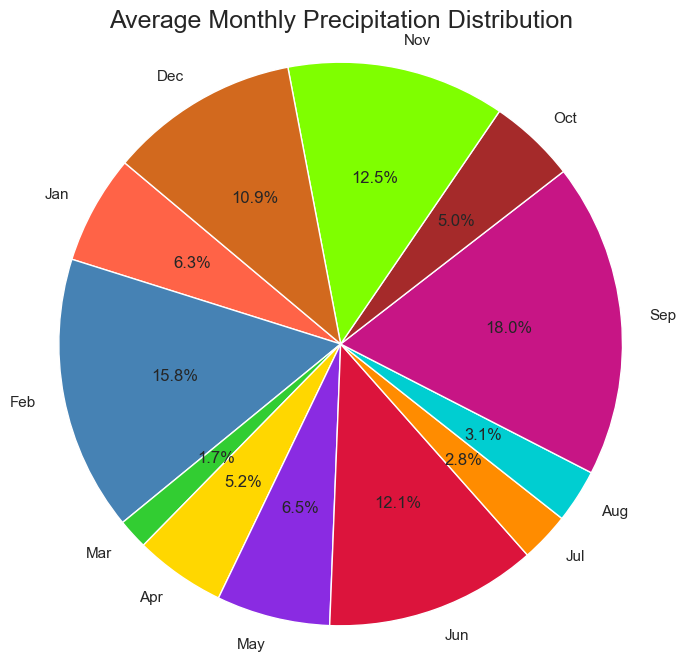

In [197]:
# Calcolare la precipitazione media mensile
monthly_precip = data.groupby('Month')['Precipitation'].mean()

# Definire le etichette dei mesi
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Crea il grafico a torta con colori distinti
plt.figure(figsize=(8, 8))
plt.pie(monthly_precip, labels=month_labels, autopct='%1.1f%%', startangle=140, 
        colors=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#DC143C', '#FF8C00', '#00CED1', 
                '#C71585', '#A52A2A', '#7FFF00', '#D2691E'])

# Impostazioni del grafico
plt.title('Average Monthly Precipitation Distribution', fontsize=18)
plt.axis('equal')  # Per renderlo un cerchio perfetto
plt.show()




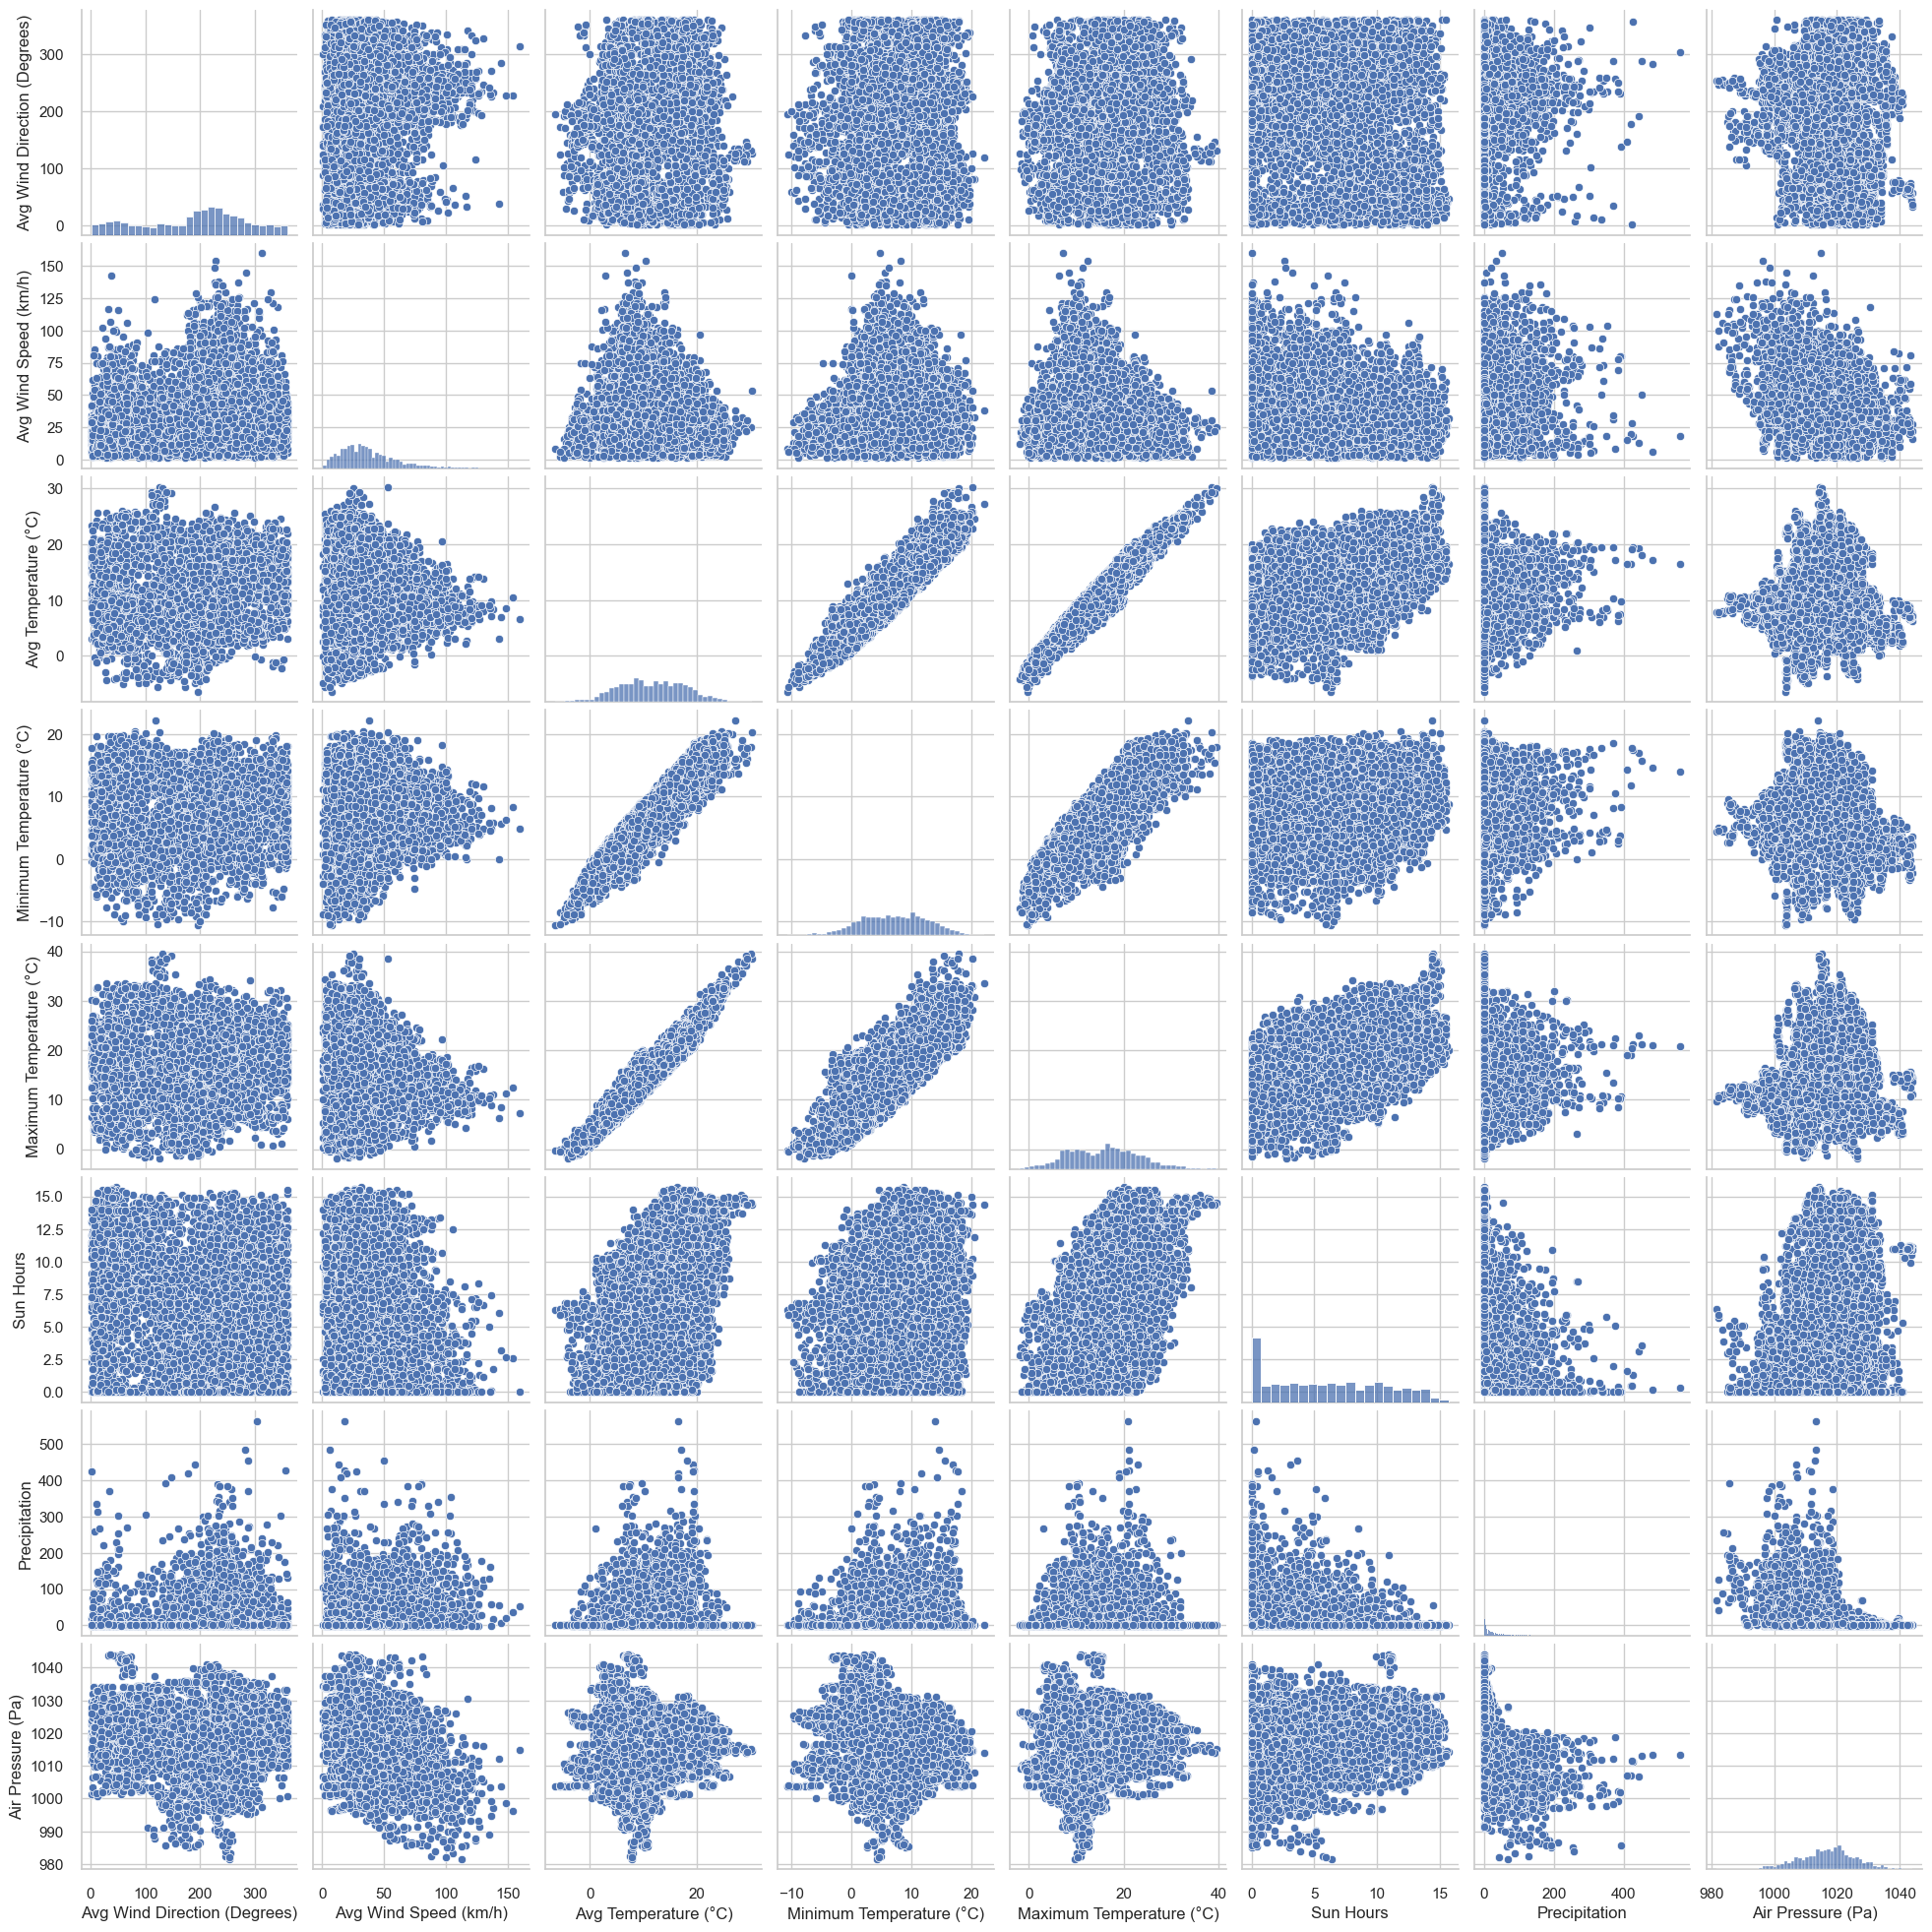

In [198]:
sns.pairplot(data[[
    'Avg Wind Direction (Degrees)', 
    'Avg Wind Speed (km/h)', 
    'Avg Temperature (°C)', 
    'Minimum Temperature (°C)', 
    'Maximum Temperature (°C)', 
    'Sun Hours', 
    'Precipitation', 
    'Air Pressure (Pa)'
]])
plt.show()


<Axes: >

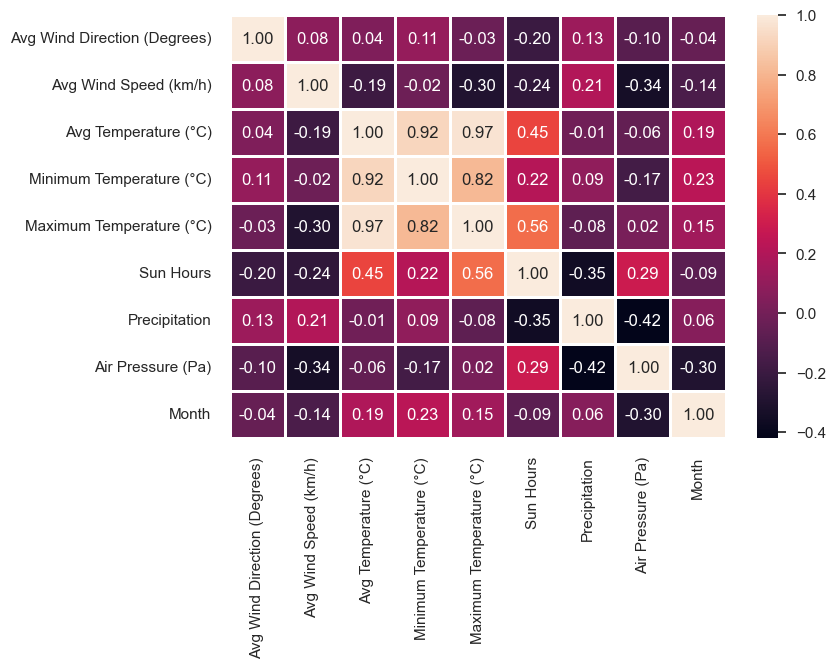

In [199]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', linewidths=2)